# Aproximación de una señal cuadrada por la serie de Fourier

Basado en el artículo: http://firsttimeprogrammer.blogspot.com/2015/04/fourier-series-and-square-wave.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

Vamos a usar la función `linspace` de `NumPy` para generar una serie de números. 

Usemos 10k puntos entre el 0 y 60, un período de 10, calculemos la serie con 10 armónicos con un nivel de contínua de 0.5 y una amplitud de 0.5 también.

## Setup

In [2]:
x = np.linspace(start=0, stop=60, num=10_000)

T = 10
armonics = 40
a0 = 0.5
amplitude = 0.5

Definimos la función `square_wave` que nos va a devolver los puntos $f(x)$ de la función cuadrada para ese período, con ese valor de contínua y esa amplitud.

## Definimos las funciones

In [3]:
def square_wave(x, T, a0, amplitude):
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    high = a0 + amplitude
    low = a0 - amplitude
    
    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return low
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return high
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if high == a0 + amplitude:
                high, low = low, high
            else:
                high = a0 + amplitude
                low = a0 - amplitude

Definimos la función `bn` que nos calculará los coeficientes de cada uno de los armónicos

In [4]:
# Bn coefficients
def bn(n):
    if (n % 2 != 0):
        return 4/(np.pi * n)
    return 0

Y la función `wn` que son los valores correspondientes al armónico 

In [5]:
# Wn
def wn(armonic, T):
    return 2 * np.pi * armonic / T

Finalmente definimos la función `fourier_series` que nos devuelve el punto $f(x)$ que 

In [6]:
# Fourier Series function
def fourier_series(armonics, x, T, a0, amplitude):
    partialSums = a0
    for armonic in range(1, armonics):
        partialSums = partialSums + amplitude * bn(armonic) * np.sin(wn(armonic, T) * x)
    return partialSums

Iteramos sobre los valores de $x$ para obtener las correspondientes gráficas.

## Iteramos

In [7]:
square_signal = []
fourier = []
for value in x:
    square_signal.append(square_wave(value, T, a0, amplitude))
    fourier.append(fourier_series(armonics, value, T, a0, amplitude))

Luego, finalmente, graficamos ambas funciones

### Graficamos

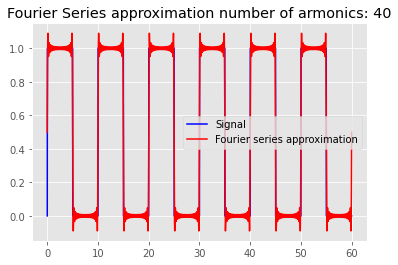

In [8]:
plt.plot(x, square_signal, color="blue", label="Signal")
plt.plot(x, fourier ,color="red", label="Fourier series approximation")
plt.title(f"Fourier Series approximation number of armonics: {armonics}")
plt.legend()
plt.show()

> Probá **jugar** con los diferentes valores, especialmente variando la cantidad de armónicos que pusimos en la sección [Setup](#Setup)